In [186]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [187]:
sns.set_theme()

In [188]:
ss_dict = pd.read_excel("./data/Superstore_EU.xls", sheet_name=None)
ss_dict.keys()

dict_keys(['Orders', 'Returns', 'People'])

In [189]:
orders = ss_dict['Orders'].drop(columns=["Row ID"])
returns = ss_dict['Returns']
people = ss_dict['People']
df = orders.merge(returns, how="left", on="Order ID").merge(people, how="left", on="Region")

In [190]:
def get_vc(data, col):
    data = data[col].value_counts(normalize=True).reset_index()
    display(data)
    x, y = data.columns
    num_x_cats = data[x].nunique()
    horizontal = num_x_cats > 10

    if horizontal:
        x, y = y, x
    ax = sns.barplot(data=data, x=x, y=y, hue=x, palette="flare" if horizontal else None, legend=False)
    
    if horizontal:
        plt.gca().xaxis.set_major_formatter(PercentFormatter(1.0)) 
    else:
        plt.gca().yaxis.set_major_formatter(PercentFormatter(1.0))  

    if len(ax.get_xticklabels()) > 4:
        plt.xticks(rotation=45)

    plt.show()


# 1. Best performing Country

### By Profit

In [191]:
x = "Country/Region"
y = "Profit"
data1 = df.groupby(x)[y]

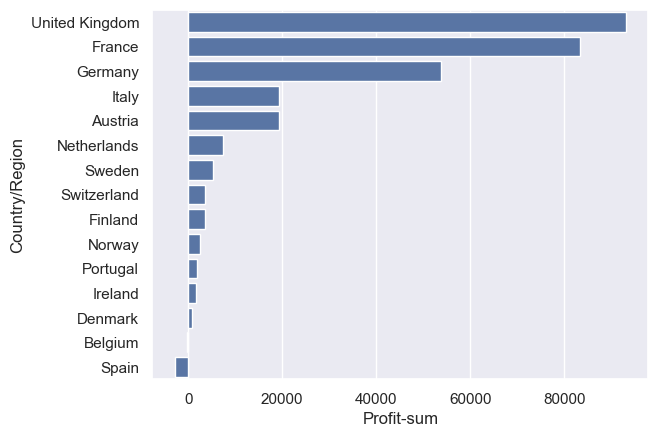

In [192]:
agg = 'sum'
data2 = data1.agg(agg).sort_values(ascending=False).reset_index()
ax = sns.barplot(data=data2, x=y, y=x)
ax.set_xlabel(f"{y}-{agg}")
top3_countries = data2.loc[:2, "Country/Region"].values

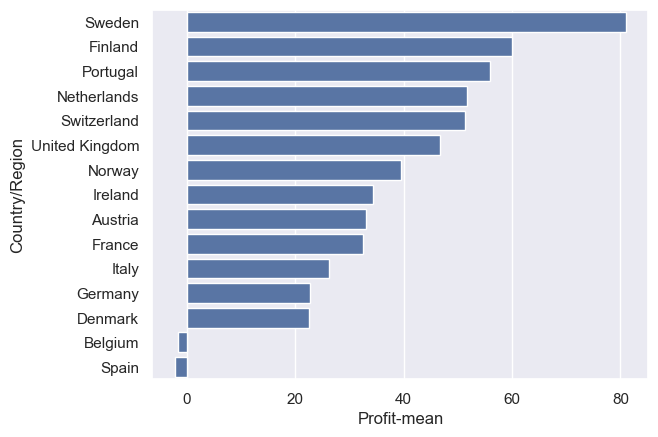

In [193]:
agg='mean'
data2 = data1.agg(agg).sort_values(ascending=False).reset_index()
ax = sns.barplot(data=data2, x=y, y=x)
ax.set_xlabel(f"{y}-{agg}");

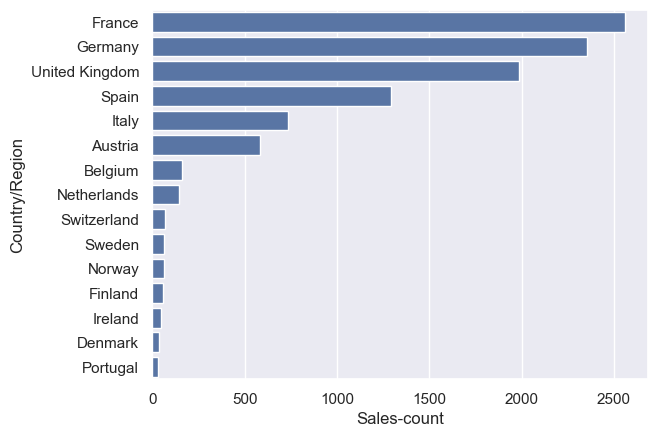

In [194]:
y = "Sales"
data1 = df.groupby(x)[y]

agg = 'count'
data2 = data1.agg(agg).sort_values(ascending=False).reset_index()
ax = sns.barplot(data=data2, x=y, y=x)
ax.set_xlabel(f"{y}-{agg}");

### Most profitable categories

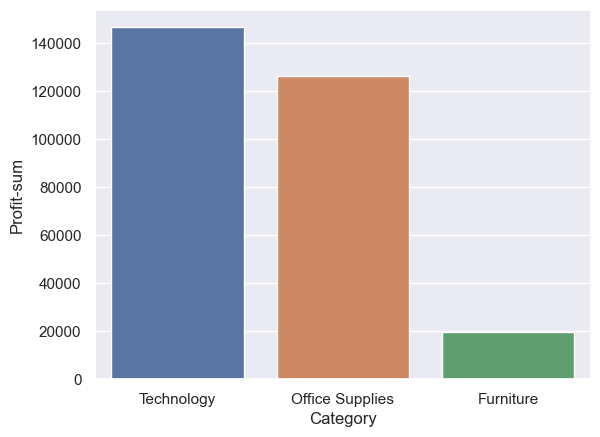

In [195]:
x, y = 'Category', 'Profit'
data1= df.groupby(x)[y]

agg='sum'
data2 = data1.agg(agg).sort_values(ascending=False).reset_index()
ax = sns.barplot(data=data2, x=x, y=y, hue=x)
ax.set_ylabel(f"{y}-{agg}");

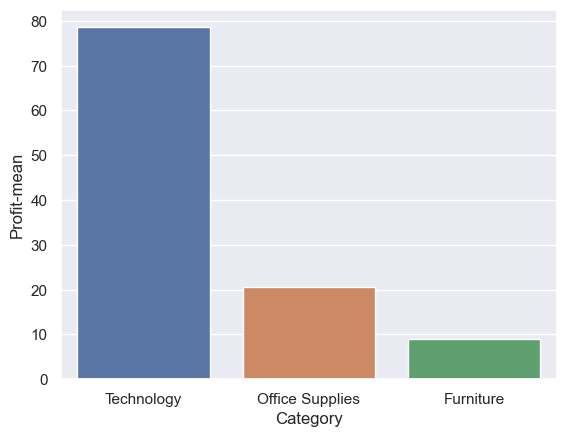

In [196]:
agg='mean'
data2 = data1.agg(agg).sort_values(ascending=False).reset_index()
ax = sns.barplot(data=data2, x=x, y=y, hue=x)
ax.set_ylabel(f"{y}-{agg}");

### Proportion of sales per category, per top 3 countries.

In [197]:
x = 'Country/Region'
y = 'Category'
df[df[x].isin(top3_countries)].groupby(x)[y].value_counts(normalize=True)

Country/Region  Category       
France          Office Supplies    0.598047
                Furniture          0.219922
                Technology         0.182031
Germany         Office Supplies    0.586485
                Furniture          0.230344
                Technology         0.183170
United Kingdom  Office Supplies    0.618904
                Furniture          0.198592
                Technology         0.182504
Name: proportion, dtype: float64

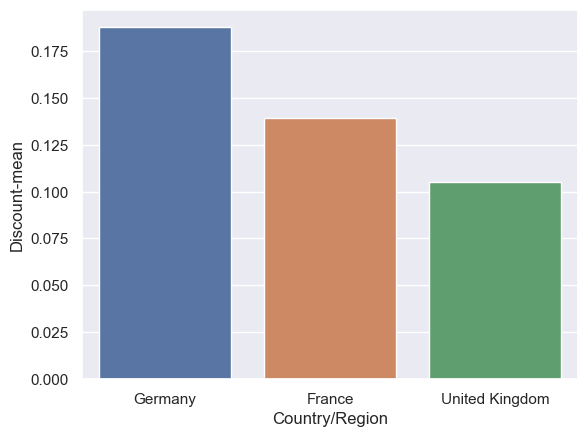

In [198]:
y = 'Discount'
data1 = df[df[x].isin(top3_countries)].groupby(x)[y]
agg="mean"
data2 = data1.agg(agg).sort_values(ascending=False).reset_index()
ax = sns.barplot(data=data2, x=x, y=y, hue=x)
ax.set_ylabel(f"{y}-{agg}");

In [199]:
df[df[x].isin(top3_countries)].groupby(x).agg({'Profit':'mean', 'Discount':'mean'}).sort_values(by="Discount", ascending=True).reset_index()

,Country/Region,Profit,Discount
0,United Kingdom,46.793199,0.105078
1,France,32.571331,0.139129
2,Germany,22.815503,0.187646


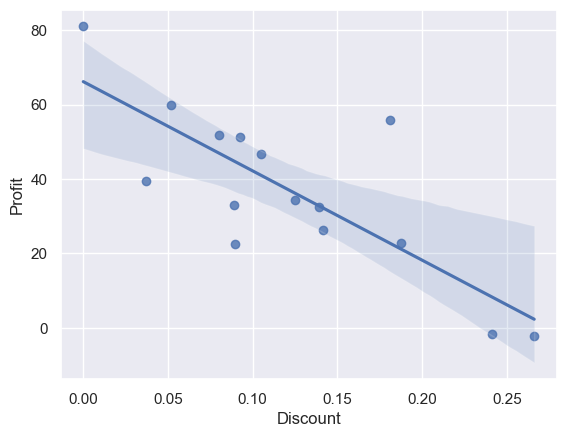

In [201]:
x='Country/Region'
profit_discount = df.groupby(x).agg({'Profit':'mean', 'Discount':'mean'}).sort_values(by="Discount", ascending=True).reset_index()
sns.regplot(data=profit_discount, x="Discount", y="Profit");

## Task 1 Conclusion:
UK has the highest total sum of profit, despite not leading in terms of mean profit per item, or total number of sales.<br>
Of the Top 3 highest performing countries, the UK has the lowest mean discount rate across all sales.<br>
Looking at all the countries, there is a strong trend for increasing mean discount rates and mean profit per item.<br>

The mean discount rate appears to be a strong driving factor in mean profit per item sold, and when multiplied by total items sold, will impact total profit.

---

# Task 2

In [202]:
annual_profit = df.groupby(['Country/Region', df['Order Date'].dt.year])['Profit'].sum().reset_index()
annual_profit

,Country/Region,Order Date,Profit
0,Austria,2021,4760.3124
1,Austria,2022,2630.4640
2,Austria,2023,3736.2454
3,Austria,2024,8163.1398
4,Belgium,2021,184.5945
5,Belgium,2022,-939.5510
6,Belgium,2023,-463.0988
7,Belgium,2024,961.3462
8,Denmark,2021,597.3780
9,Denmark,2022,18.2280


In [203]:
annual_profit['YoY_Growth'] = annual_profit.groupby('Country/Region')['Profit'].pct_change() * 100  # Multiply by 100 to get percentage
annual_profit

,Country/Region,Order Date,Profit,YoY_Growth
0,Austria,2021,4760.3124,NaN
1,Austria,2022,2630.4640,-44.741778
2,Austria,2023,3736.2454,42.037504
3,Austria,2024,8163.1398,118.485108
4,Belgium,2021,184.5945,NaN
5,Belgium,2022,-939.5510,-608.981037
6,Belgium,2023,-463.0988,-50.710627
7,Belgium,2024,961.3462,-307.589871
8,Denmark,2021,597.3780,NaN
9,Denmark,2022,18.2280,-96.948666


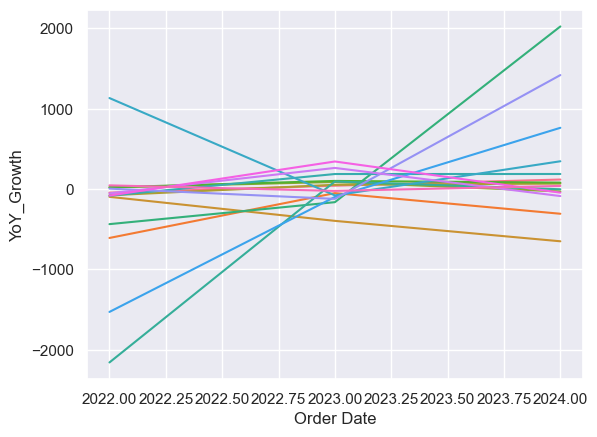

In [204]:
sns.lineplot(data=annual_profit, x='Order Date', y='YoY_Growth', hue='Country/Region', legend=False);

# Best and Worst Performing Products by Location

In [239]:
max_profit = df.loc[df.groupby('Country/Region')['Profit'].idxmax()][['Country/Region', 'Product Name', 'Profit']]

# Find the product with the minimum profit per country
min_profit = df.loc[df.groupby('Country/Region')['Profit'].idxmin()][['Country/Region', 'Product Name', 'Profit']]

# Combine the results
result = pd.concat([max_profit, min_profit], axis=0, keys=['Max Profit', 'Min Profit']).reset_index().drop(columns='level_1').rename(columns={'level_0':'Level'})
result = result[['Country/Region','Level', 'Product Name', 'Profit']]
result.sort_values(by=["Country/Region"]).reset_index(drop=True)

,Country/Region,Level,Product Name,Profit
0,Austria,Max Profit,Canon Image Class D660 Copier,1379.9770
1,Austria,Min Profit,"Tenex Chairmat w/ Average Lip, 45"" x 53""",-378.4000
2,Belgium,Max Profit,Plantronics CS510 - Over-the-Head monaural Wir...,217.7670
3,Belgium,Min Profit,GBC DocuBind TL300 Electric Binding System,-1031.5385
4,Denmark,Max Profit,GBC ProClick Punch Binding System,219.4514
5,Denmark,Min Profit,Novimex Swivel Fabric Task Chair,-172.1172
6,Finland,Max Profit,Canon PC1080F Personal Copier,701.9883
7,Finland,Min Profit,"Gould Plastics 9-Pocket Panel Bin, 18-3/8w x 5...",-50.8704
8,France,Max Profit,GBC Ibimaster 500 Manual ProClick Binding System,4946.3700
9,France,Min Profit,Lexmark MX611dhe Monochrome Laser Printer,-3399.9800


# Most Valuable Customers

In [246]:
top3_cust = df.groupby('Customer Name')['Profit'].sum().sort_values(ascending=False).iloc[:3].reset_index()
top3_cust

,Customer Name,Profit
0,Tamara Chand,8981.3239
1,Raymond Buch,6976.0959
2,Sanjit Chand,5757.4119


In [264]:
grouped = df.groupby([df['Order Date'].dt.year, 'Customer Name'])['Profit'].sum().reset_index().rename(columns={"Order Date":"Year"})
top3_per_year = grouped.sort_values(['Year', 'Profit'], ascending=[True, False]).groupby('Year').head(3).reset_index(drop=True)
top3_per_year

,Year,Customer Name,Profit
0,2021,Sanjit Chand,5462.5830
1,2021,Tom Boeckenhauer,2567.6441
2,2021,Nathan Mautz,2413.8367
3,2022,Christopher Martinez,3197.4580
4,2022,Keith Dawkins,2810.0215
5,2022,Harry Marie,2450.9987
6,2023,Tamara Chand,8764.9483
7,2023,Adrian Barton,4747.8222
8,2023,Sanjit Engle,2673.7824
9,2024,Raymond Buch,6780.8963


In [265]:
top3_per_year['Customer Name'].value_counts()

Customer Name
Sanjit Chand            1
Tom Boeckenhauer        1
Nathan Mautz            1
Christopher Martinez    1
Keith Dawkins           1
Harry Marie             1
Tamara Chand            1
Adrian Barton           1
Sanjit Engle            1
Raymond Buch            1
Hunter Lopez            1
Tom Ashbrook            1
Name: count, dtype: int64

# Task 4: Average Transaction Spend per Location

In [285]:
sales_per_transaction = df.groupby(['Country/Region', 'Order ID'])['Sales'].sum().reset_index()
avg_transaction_per_location= sales_per_transaction.groupby(['Country/Region'])['Sales'].mean().sort_values(ascending=False)
avg_transaction_per_location

Country/Region
Sweden            557.861765
United Kingdom    529.937040
Italy             515.626088
Germany           465.438852
Ireland           464.205625
Finland           448.705103
Portugal          438.504765
Austria           435.168222
Netherlands       434.258144
France            422.905689
Spain             413.006860
Norway            353.109771
Belgium           307.373556
Switzerland       307.305805
Denmark           140.862143
Name: Sales, dtype: float64